<a href="https://colab.research.google.com/github/brunoclvrt/Case-2---BNB-price-prediction/blob/main/BNB_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**

Launched in July 2017, Binance is the biggest cryptocurrency exchange globally based on daily trading volume. Binance aims to bring cryptocurrency exchanges to the forefront of financial activity globally. The idea behind Binance’s name is to show this new paradigm in global finance — Binary Finance, or Binance.

Binance is a unique ecosystem of decentralized, blockchain-based networks. The company has grown to be the leading crypto exchange in a number of countries, and their side organizations are attracting significant interest as well. With an initial maximum supply of 200,000,000 BNB coins, of which 168,137,036 are currently in circulation as of September 2021.

The prupose of this study is predict the BNB price until the end of year (december 31th), and answer a simple question: with the actual events running (FED increasing interest rate, Ukraine-Russia war, an lost of investors who are moving to fixed income to protect your money to volatile markets), the BNB price tends to go up or down?

#**Data Gathering**
###To start our exploration, we have to load some libraries

In [46]:
!pip install yfinance
!pip install AutoTS
!pip install plotly
!pip install gitly==1.0.1

In [47]:
import pandas as pd # data manipulation
import numpy as np # numeric calculations

import yfinance as yf # in this library, we can get our stocks
from datetime import date, timedelta #library for time series manipulation
today = date.today()

###To continue our capture strategy, we need to pass some informations

In [48]:
end_date = today.strftime("%Y-%m-%d")
start_date = today - timedelta(days=1595) #we are capturing data since 01/01/2018
start_date = start_date.strftime("%Y-%m-%d")

In [49]:
# LOADNG OUR DATASET

df =yf.download("BNB-USD", start=start_date, end=end_date,progress=False) #collect our BNB stocks dataset
df["Date"] = df.index
df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True,inplace=True)

df.head() #showing the first rows

,Open,High,Low,Close,Adj Close,Volume,Date
0,8.62953,8.700570,7.95922,8.41461,8.41461,66422800,2018-01-01
1,8.45770,9.122590,8.21718,8.83777,8.83777,104789000,2018-01-02
2,8.77014,9.580780,8.52918,9.53588,9.53588,108852000,2018-01-03
3,9.44584,9.538490,8.85413,9.21399,9.21399,158819008,2018-01-04
4,9.14568,16.717699,9.09468,14.91720,14.91720,341504992,2018-01-05


#**Data Exploration**
###Now, we're make some analysis in our dataset

In [50]:
#First of all, let's see the total of rows and columns

df.shape

(1596, 7)

In [51]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1.596000e+03
mean,132.645814,137.454473,127.360438,132.784422,132.784422,9.731998e+08
std,189.553300,196.054748,182.181643,189.478701,189.478701,1.531716e+09
min,4.532951,4.635010,4.189971,4.528650,4.528650,9.284000e+03
25%,13.926335,14.408100,13.489937,13.924800,13.924800,1.280154e+08
50%,21.934092,22.554373,21.049829,21.961051,21.961051,2.992278e+08
75%,293.212975,305.233734,272.832848,292.764336,292.764336,1.471455e+09
max,676.315918,690.931946,634.549500,675.684082,675.684082,1.798295e+10


There are few libs and modules that should be installed in Colab in order to generate static plots from Plotly.
Summary: Install Orca, update plotly and update apt-get

apt-get update
pip install plotly>=4.0.0
wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
chmod +x /usr/local/bin/orca
apt-get install xvfb libgtk2.0-0 libgconf-2-4
Done. Have fun! :)


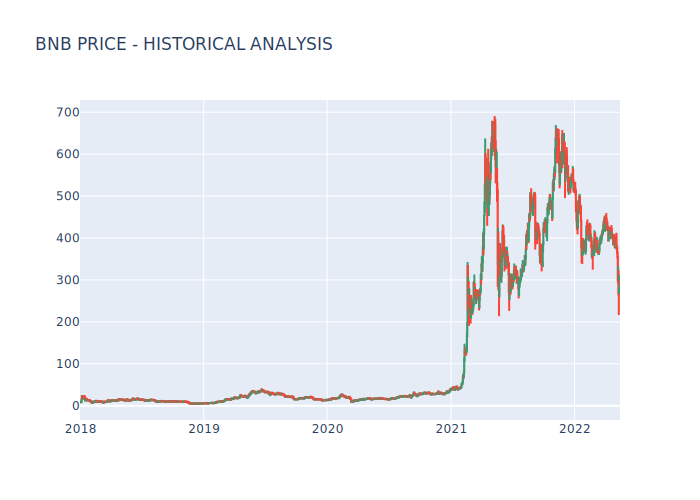

In [52]:
import plotly.graph_objs as go
from gitly.colab.plot import GitlyPlotter #library to plot some plotly graphs on github

gitly = GitlyPlotter('github')
gitly.config_render('colab')

data = go.Candlestick(x = df["Date"], open = df["Open"],high = df["High"], low = df["Low"], close = df["Close"])
figure = go.Figure(data=data)

figure.update_layout(title = "BNB PRICE - HISTORICAL ANALYSIS", xaxis_rangeslider_visible = False)

gitly.show(figure)

As we can see, the prices start to go higher after 2021's january, reaching your peak in the middle of the first semester of 2021

In [53]:
#Now let's see te variation between the top and botton prices

x1 = df["Close"].max()
x2 = df["Close"].min()

x = ((x1/x2)-1)*100

print(x,"%")

14820.21045633444 %


We can see a variation of almost 15000%!

#**Now, it's time to make our predictions**
###Let's see if it works hahahahaha

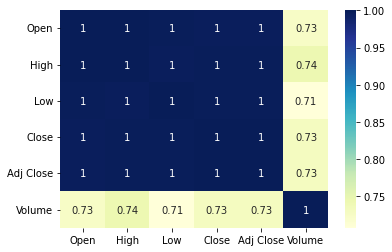

In [54]:
#Before to make our predicitons, we have to get the correlation between the values

correlation = df.corr()

import matplotlib.pyplot as plt
import seaborn as sns

figure = sns.heatmap(correlation, cmap = "YlGnBu",annot = True)

plt.show(figure)

The volume column has a low correlation with the other columns in comparison. But, the correlations are almost perfect betwenn prices columns (open, high, low and close). To continue our study, we'll focus our predictions in these columns.

To continue our study, let's define our prediction time, i decided to predict until the next 90 days (considering i made this study in 2021's may).

In [ ]:
#Importing our machine learning library

from autots import AutoTS

model = AutoTS(forecast_length = 232, frequency = 'infer', ensemble = 'simple')
model = model.fit(df, date_col = 'Date', value_col = 'Close', id_col = None)

prediction = model.predict()
forecast = prediction.forecast


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Inferred frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 6 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
43/43 [==============================] - 12s 9ms/step - loss: 0.4181
Epoch 2/50
43/43 [==============================] - 0s 8ms/step - loss: 0.4174
Epoch 3/50
43/43 [==============================] - 0s 7ms/step - loss: 0.4170
Epoch 4/50
43/43 [==============================] - 0s 8ms/step - loss: 0.4155
Epoch 5/50
43/43 [==============================] - 0s 8ms/step - loss: 0.4115
Epoch 6/50
43/43 [==============================] - 0s 9ms/step - loss: 0.4071
Epoch 7/50
43/43 [==============================] - 0s 7ms/step - loss: 0.4031
Epoch 8/50
43/43 [==============================] - 0s 8ms/step - loss: 0.4024
Epoch 9/50
43/43 [==============================] - 0s 8ms/step - loss: 0.4015
Epoch 10/50
43/43 [==============================] - 0s 7ms/step - loss: 0.3988
Epoch 11/50
43/43 [==============================] - 0s 8ms/step - loss: 0.3953
Epoch 12/50
43/43 [==============================] - 0s 7ms/

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 42 with model AverageValueNaive in generation 0 of 10
Model Number: 43 with model GLS in generation 0 of 10
Model Number: 44 with model SeasonalNaive in generation 0 of 10
Model Number: 45 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 45: GLM
Model Number: 46 with model ETS in generation 0 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 47 with model FBProphet in generation 0 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 48 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 48: GluonTS
Model Number: 49 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 49: UnobservedComponents
Model Number: 50 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 50: VAR
Model Number: 51 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 51: VECM
Model Number: 52 with model WindowRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 52: WindowRegression
Model Number: 53 with model DatepartRegression in generation 0 of 10
Model Number: 54 with model MultivariateRegression in generation 0 of 10
Model

Now, it's time to plot our results

In [ ]:
forecast['Date'] = forecast.index #passing the index date to a Date column

import plotly.express as px

fig = px.line(forecast, x = "Date", y = "Close", title = 'BNB close price forecast until the end of year') #plotting our forecast

gitly.show(fig)

In [ ]:
# now, let's see BNB percentile of variation

x1 = forecast['Close'].min()
x2 = forecast['Close'].max()

x = ((x2/x1)-1)*100

print(x,"%")

Wich means from now until the peak (around final of september/october of december), the BNB tends to variate closer to 67%.(too good, isn't it)?


#**Conclusions**

The BNB coin is the most valuable coins in cryptomarket today. Unfortunately, some events that happens today made all of cryptocurrencies drops, and with the characteristic volatility of the market, your price goes down. 

As we see with the forecast, despite some actual events, the BNB price tends to increase during the days, what makes new and old investors became bullish (some crypto slang when you bet in some cryptocurrent increase).